In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from datetime import datetime as dt 
import itertools

%matplotlib inline

In [25]:
test = pd.read_csv('2005-06.csv')
test.keys()

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [8]:
test[['HS', 'AS', 'HST', 'AST', 'HHW',
       'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR']]

,HS,AS,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO,HY,AY,HR,AR
0,17,8,14,4,2,1,6,6,13,12,8,6,1,2,0,0
1,17,12,10,5,1,0,7,7,19,14,2,3,1,2,0,0
2,6,16,3,9,0,1,8,4,15,21,1,3,5,3,1,0
3,6,13,4,6,0,0,5,8,11,13,0,2,1,1,0,0
4,17,12,8,6,0,0,6,4,21,20,6,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3,9,1,3,0,0,8,7,22,18,2,2,4,2,0,0
376,19,11,7,5,0,0,5,6,13,15,5,2,0,0,0,0
377,9,5,5,1,0,0,5,1,10,14,2,4,0,5,1,1
378,11,8,7,5,0,1,7,5,17,10,3,2,1,2,0,0


In [162]:
folder = ''
raw_data_1 = pd.read_csv(folder +'2000-01.csv')
raw_data_2 = pd.read_csv(folder +'2001-02.csv')
raw_data_3 = pd.read_csv(folder +'2002-03.csv')
raw_data_4 = pd.read_csv(folder +'2003-04.csv')
raw_data_5 = pd.read_csv(folder +'2004-05.csv')
raw_data_6 = pd.read_csv(folder +'2005-06.csv')
raw_data_7 = pd.read_csv(folder +'2006-07.csv')
raw_data_8 = pd.read_csv(folder +'2007-08.csv')
raw_data_9 = pd.read_csv(folder +'2008-09.csv')
raw_data_10 = pd.read_csv(folder +'2009-10.csv')
raw_data_11 = pd.read_csv(folder +'2010-11.csv')
raw_data_12 = pd.read_csv(folder +'2011-12.csv')
raw_data_13 = pd.read_csv(folder +'2012-13.csv')
raw_data_14 = pd.read_csv(folder +'2013-14.csv')
raw_data_15 = pd.read_csv(folder +'2014-15.csv')
raw_data_16 = pd.read_csv(folder +'2015-16.csv')
raw_data_17 = pd.read_csv(folder +'2016-17.csv')
raw_data_18 = pd.read_csv(folder +'2017-18.csv')

In [163]:
raw_data_1.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Attendance', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW',
       'AHW', 'HC', 'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [164]:
# Gets all the statistics related to gameplay

columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

playing_statistics_1 = raw_data_1[columns_req]                      
playing_statistics_2 = raw_data_2[columns_req]
playing_statistics_3 = raw_data_3[columns_req]
playing_statistics_4 = raw_data_4[columns_req]
playing_statistics_5 = raw_data_5[columns_req]
playing_statistics_6 = raw_data_6[columns_req]
playing_statistics_7 = raw_data_7[columns_req]
playing_statistics_8 = raw_data_8[columns_req]
playing_statistics_9 = raw_data_9[columns_req]
playing_statistics_10 = raw_data_10[columns_req]
playing_statistics_11 = raw_data_11[columns_req]   
playing_statistics_12 = raw_data_12[columns_req]
playing_statistics_13 = raw_data_13[columns_req]
playing_statistics_14 = raw_data_14[columns_req]
playing_statistics_15 = raw_data_15[columns_req]
playing_statistics_16 = raw_data_16[columns_req]
playing_statistics_17 = raw_data_17[columns_req]
playing_statistics_18 = raw_data_18[columns_req]

In [ ]:
# Goals scored and conceded at the end of matchweek, arranged by teams and matchweek 
def get_goals_scored(playing_stat): 
    # Create a dictionary with team names as keys
    teams = {}
    for i in set(playing_stat.HomeTeam.unique()): 
        teams[i] = []
    
    for i in range(len(playing_stat)): 
        HTGS = playing_stat.iloc[i]["FTHG"]
        ATGS = playing_stat.iloc[i]["FTAG"]
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data = teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0 
    # Aggregate to get uptil that point 
    for i in range(2,39): 
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored    


# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in set(playing_stat.HomeTeam.unique()): 
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded


def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)

    j = 0 # round from 0-37 (means 1 - 38 in real world) 
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380): 
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
        
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat


# Apply to each dataset
playing_statistics_1 = get_gss(playing_statistics_1)
playing_statistics_2 = get_gss(playing_statistics_2)
playing_statistics_3 = get_gss(playing_statistics_3)
playing_statistics_4 = get_gss(playing_statistics_4)
playing_statistics_5 = get_gss(playing_statistics_5)
playing_statistics_6 = get_gss(playing_statistics_6)
playing_statistics_7 = get_gss(playing_statistics_7)
playing_statistics_8 = get_gss(playing_statistics_8)
playing_statistics_9 = get_gss(playing_statistics_9)
playing_statistics_10 = get_gss(playing_statistics_10)
playing_statistics_11 = get_gss(playing_statistics_11)
playing_statistics_12 = get_gss(playing_statistics_12)
playing_statistics_13 = get_gss(playing_statistics_13)
playing_statistics_14 = get_gss(playing_statistics_14)
playing_statistics_15 = get_gss(playing_statistics_15)
playing_statistics_16 = get_gss(playing_statistics_16)
playing_statistics_17 = get_gss(playing_statistics_17)
playing_statistics_18 = get_gss(playing_statistics_18)
        


In [170]:
# code cua tk tren mang

def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,39):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in set(playing_stat.HomeTeam.unique()):
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat

def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1

    playing_stat['HM' + str(num)] = h                 
    playing_stat['AM' + str(num)] = a

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    


In [ ]:
playing_statistics_1 = add_form_df(get_agg_points(playing_statistics_1))
playing_statistics_2 = add_form_df(get_agg_points(playing_statistics_2))
playing_statistics_3 = add_form_df(get_agg_points(playing_statistics_3))
playing_statistics_4 = add_form_df(get_agg_points(playing_statistics_4))
playing_statistics_5 = add_form_df(get_agg_points(playing_statistics_5))
playing_statistics_6 = add_form_df(get_agg_points(playing_statistics_6))
playing_statistics_7 = add_form_df(get_agg_points(playing_statistics_7))
playing_statistics_8 = add_form_df(get_agg_points(playing_statistics_8))
playing_statistics_9 = add_form_df(get_agg_points(playing_statistics_9))
playing_statistics_10 = add_form_df(get_agg_points(playing_statistics_10))
playing_statistics_11 = add_form_df(get_agg_points(playing_statistics_11))
playing_statistics_12 = add_form_df(get_agg_points(playing_statistics_12))
playing_statistics_13 = add_form_df(get_agg_points(playing_statistics_13))
playing_statistics_14 = add_form_df(get_agg_points(playing_statistics_14))
playing_statistics_15 = add_form_df(get_agg_points(playing_statistics_15))
playing_statistics_16 = add_form_df(get_agg_points(playing_statistics_16))
playing_statistics_17 = add_form_df(get_agg_points(playing_statistics_17))
playing_statistics_18 = add_form_df(get_agg_points(playing_statistics_18))

In [ ]:
# Get MatchWeek: 
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat


playing_statistics_1 = get_mw(playing_statistics_1)
playing_statistics_2 = get_mw(playing_statistics_2)
playing_statistics_3 = get_mw(playing_statistics_3)
playing_statistics_4 = get_mw(playing_statistics_4)
playing_statistics_5 = get_mw(playing_statistics_5)
playing_statistics_6 = get_mw(playing_statistics_6)
playing_statistics_7 = get_mw(playing_statistics_7)
playing_statistics_8 = get_mw(playing_statistics_8)
playing_statistics_9 = get_mw(playing_statistics_9)
playing_statistics_10 = get_mw(playing_statistics_10)
playing_statistics_11 = get_mw(playing_statistics_11)
playing_statistics_12 = get_mw(playing_statistics_12)
playing_statistics_13 = get_mw(playing_statistics_13)
playing_statistics_14 = get_mw(playing_statistics_14)
playing_statistics_15 = get_mw(playing_statistics_15)
playing_statistics_16 = get_mw(playing_statistics_16)
playing_statistics_17 = get_mw(playing_statistics_17)
playing_statistics_18 = get_mw(playing_statistics_18)



In [234]:
playing_stat = pd.concat([playing_statistics_1,
                          playing_statistics_2,
                          playing_statistics_3,
                          playing_statistics_4,
                          playing_statistics_5,
                          playing_statistics_6,
                          playing_statistics_7,
                          playing_statistics_8,
                          playing_statistics_9,
                          playing_statistics_10,
                          playing_statistics_11,
                          playing_statistics_12,
                          playing_statistics_13,
                          playing_statistics_14,
                          playing_statistics_15,
                          playing_statistics_16,
                          playing_statistics_17,
                          playing_statistics_18
                          ], axis = 0, ignore_index = True)

playing_stat

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,...,AM1,HM2,AM2,HM3,AM3,HM4,AM4,HM5,AM5,MW
0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
2,19/08/00,Coventry,Middlesbrough,1,3,A,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
3,19/08/00,Derby,Southampton,2,2,D,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,...,M,M,M,M,M,M,M,M,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,35,...,D,L,W,L,W,L,W,W,W,38
6836,13/05/18,Southampton,Man City,0,1,A,37,105,55,27,...,W,D,D,W,W,D,W,L,W,38
6837,13/05/18,Swansea,Stoke,1,2,A,27,33,54,67,...,L,L,D,L,D,L,D,D,L,38
6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,55,...,W,L,L,W,L,D,D,L,L,38


In [235]:
# Get the form points: 
def get_form_points(string): 
    sum = 0 
    for letter in string: 
        sum += get_points(letter)
    return sum


# consecutive 5 game performance 
playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']


In [236]:
playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

In [237]:
# Identify win/lose streak if any. 
def get_3game_ws(string): 
    if string[-3:] == "WWW": 
        return 1
    return 0 

def get_5game_ws(string): 
    if string[-5:] == "WWWWW": 
        return 1
    return 0 

def get_3game_ls(string): 
    if string[-3:] == "LLL": 
        return 1
    return 0 

def get_5game_ls(string): 
    if string[-5:] == "LLLLL": 
        return 1
    return 0 


# apply to table 
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

In [239]:
# Get goal difference 
playing_stat["HTGD"] = playing_stat["HTGS"] - playing_stat["HTGC"]
playing_stat["ATGD"] = playing_stat["ATGS"] - playing_stat["ATGC"]

# Diff in points
playing_stat["DiffPts"] = playing_stat["HTP"] - playing_stat["ATP"] # cumuulative point
playing_stat["DiffFormPts"] = playing_stat["HTFormPts"] - playing_stat["ATFormPts"] # points in 5 latest matches

In [240]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [241]:
from datetime import date

In [243]:
# if the home team wins or not 
def only_hw(string): 
    if string == "H":
        return "H" 
    return "NH"

def date_adjusted(column): 
    d,m,y = column.split("/")
    if len(y) == 2: 
        y = int(y) + 2000
    elif len(y) == 4: 
        pass
    else: 
        raise ValueError
    return date(int(y),int(m), int(d))

playing_stat["FTR"] = playing_stat.FTR.apply(only_hw)
playing_stat["Date"] = playing_stat.Date.apply(date_adjusted)


In [244]:
# test set is from 2015-16 till latest available season
playing_stat_test = playing_statistics_1[5700:]

#saving final playing stat
playing_stat.to_csv("final_dataset.csv")

# saving test set 
playing_stat_test.to_csv("test_set.csv")


In [246]:
dataset = pd.read_csv("final_dataset.csv")
dataset["Date"] = pd.to_datetime(dataset.Date)

In [251]:
dataset2 = dataset.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC',
       'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'DiffPts'] )

In [258]:
dataset2.keys()

Index(['Unnamed: 0', 'FTR', 'HTP', 'ATP', 'HM1', 'AM1', 'HM2', 'AM2', 'HM3',
       'AM3', 'HTGD', 'ATGD', 'DiffFormPts'],
      dtype='object')

In [259]:
# Total number of matches 
n_matches = dataset2.shape[0] # or len(dataset2)

# Calculate number of features
n_features = dataset2.shape[1] - 1 # because 1 variable will the target

# Calculate matches won by home team. 
n_homewins = len(dataset[dataset.FTR == "H"])

# Calculate win rate for home team
win_rate = (float(n_homewins) / n_matches) * 100


# Print the results
print("Total number of matches: {}".format(n_matches))
print ("Number of features: {}".format(n_features))
print( "Number of matches won by home team: {}".format(n_homewins))
print ("Win rate of home team: {:.2f}%".format(win_rate))

Total number of matches: 6840
Number of features: 12
Number of matches won by home team: 3176
Win rate of home team: 46.43%


array([[<Axes: xlabel='HTGD', ylabel='HTGD'>,
        <Axes: xlabel='ATGD', ylabel='HTGD'>,
        <Axes: xlabel='HTP', ylabel='HTGD'>,
        <Axes: xlabel='ATP', ylabel='HTGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTGD'>],
       [<Axes: xlabel='HTGD', ylabel='ATGD'>,
        <Axes: xlabel='ATGD', ylabel='ATGD'>,
        <Axes: xlabel='HTP', ylabel='ATGD'>,
        <Axes: xlabel='ATP', ylabel='ATGD'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATGD'>],
       [<Axes: xlabel='HTGD', ylabel='HTP'>,
        <Axes: xlabel='ATGD', ylabel='HTP'>,
        <Axes: xlabel='HTP', ylabel='HTP'>,
        <Axes: xlabel='ATP', ylabel='HTP'>,
        <Axes: xlabel='DiffFormPts', ylabel='HTP'>],
       [<Axes: xlabel='HTGD', ylabel='ATP'>,
        <Axes: xlabel='ATGD', ylabel='ATP'>,
        <Axes: xlabel='HTP', ylabel='ATP'>,
        <Axes: xlabel='ATP', ylabel='ATP'>,
        <Axes: xlabel='DiffFormPts', ylabel='ATP'>],
       [<Axes: xlabel='HTGD', ylabel='DiffFormPts'>,
        <Axes

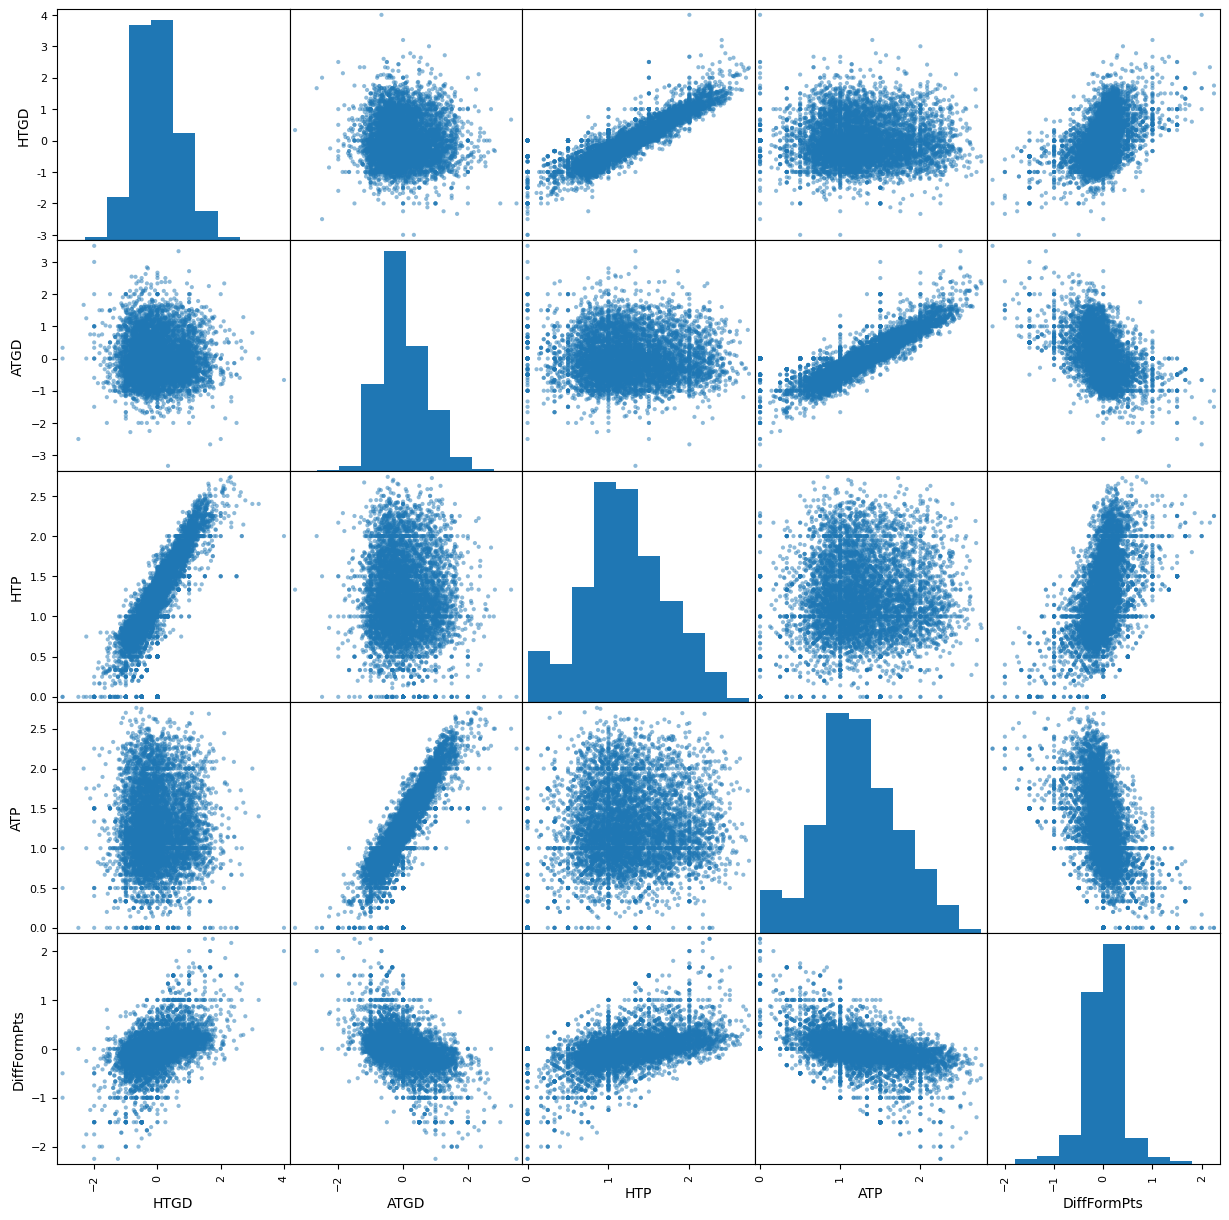

In [ ]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

#the scatter matrix is plotting each of the columns specified against each other column.
#You would have observed that the diagonal graph is defined as a histogram, which means that in the 
#section of the plot matrix where the variable is against itself, a histogram is plotted.

#Scatter plots show how much one variable is affected by another. 
#The relationship between two variables is called their correlation
#negative vs positive correlation

#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points

scatter_matrix(dataset2[['HTGD','ATGD','HTP','ATP','DiffFormPts']], figsize=(15,15))

In [332]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = dataset2.drop(['FTR'], axis = 1)
y_all = dataset2['FTR']

# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

In [333]:
# Adjust data type for wrong type columns
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')



In [334]:
#Because machine learning does not understand categorical data, we have to transform them into dummy data using get_dummies
def preprocess_features(X): 
    output = pd.DataFrame(index = X.index)

    # investigate if each feature is categorical or not to get dummies
    for col, col_data in X.items(): 
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)

        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (30 total features):
['Unnamed: 0', 'HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_M', 'HM1_W', 'AM1_D', 'AM1_L', 'AM1_M', 'AM1_W', 'HM2_D', 'HM2_L', 'HM2_M', 'HM2_W', 'AM2_D', 'AM2_L', 'AM2_M', 'AM2_W', 'HM3_D', 'HM3_L', 'HM3_M', 'HM3_W', 'AM3_D', 'AM3_L', 'AM3_M', 'AM3_W', 'HTGD', 'ATGD', 'DiffFormPts']


In [335]:
# Spliting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                                    stratify = y_all) # de bao dam trong ca train va test set deu co % target nhu nhau



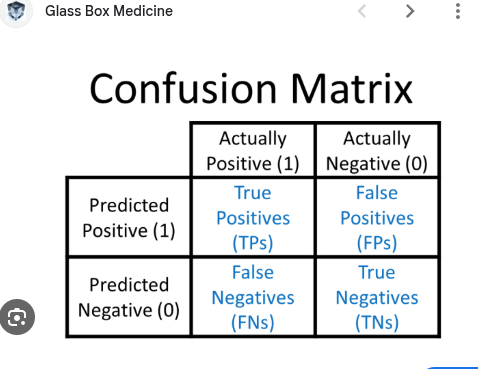

## Logistics Regression 


              precision    recall  f1-score   support

           H       0.64      0.56      0.60       953
          NH       0.66      0.73      0.69      1099

    accuracy                           0.65      2052
   macro avg       0.65      0.64      0.64      2052
weighted avg       0.65      0.65      0.65      2052



/home/hung-nguyen/anaconda3/envs/final_project/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


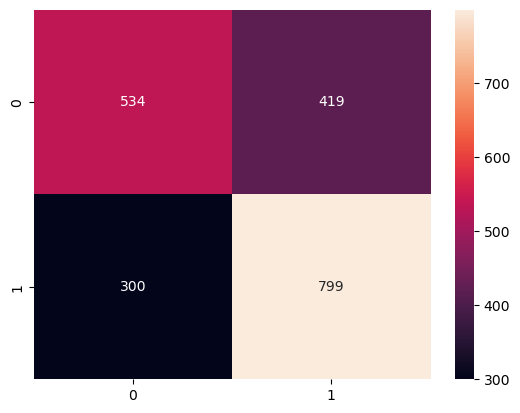

In [336]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True,fmt='d')

print(classification_report(y_test, Y_pred))

## RandomForest


              precision    recall  f1-score   support

           H       0.62      0.54      0.58       953
          NH       0.64      0.71      0.67      1099

    accuracy                           0.63      2052
   macro avg       0.63      0.63      0.62      2052
weighted avg       0.63      0.63      0.63      2052



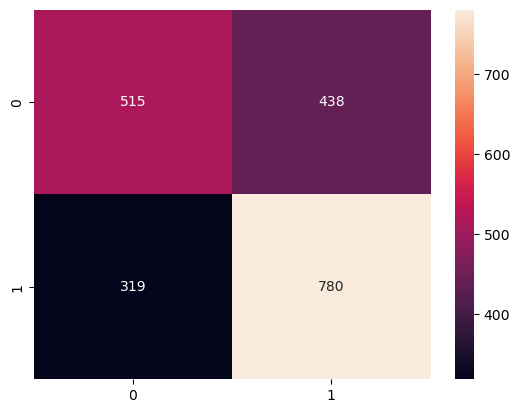

In [337]:
#fitting the RANDOM FOREST to the training se
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features= 10, 
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

#predicting result
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True, fmt='d')

print(classification_report(y_test, Y_pred))

## Xgboost


In [338]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(seed=83)
classifier.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['H' 'NH']

In [339]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)

sns.heatmap(cm, annot=True,fmt='d')


print(classification_report(y_test, Y_pred))

NotFittedError: need to call fit or load_model beforehand